## Semana 5 Acelera Dev Data Science

### Pensamento estatístico em Python

Densenvolvido durante a Semana 5 do Programa Acelera Dev.

## Baseado no notebook do [Kazuki Yokoyama](https://github.com/codenation-dev/Data-Science-Online/blob/master/Semana%205/aula_5_pensamento_estatistico_em_python%20(2).ipynb)

### Hipóteses

H0: hipótese nula.

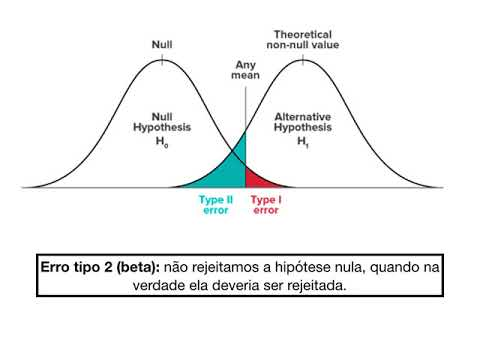

In [1]:
#Imports
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as sct
import seaborn as sns

In [2]:
#Configurações pro matplotlib
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

### Classificação do teste de hipótese

Os Testes de Hipótese podem ser classificados em:

* **Bilaterais**: quando a região crítica se encontra dos dois lados de uma distribuição de T sob o H0.

* **Unilaterais**: quando a região crítica encontra-se em apenas um dos lados da distribuição normal.


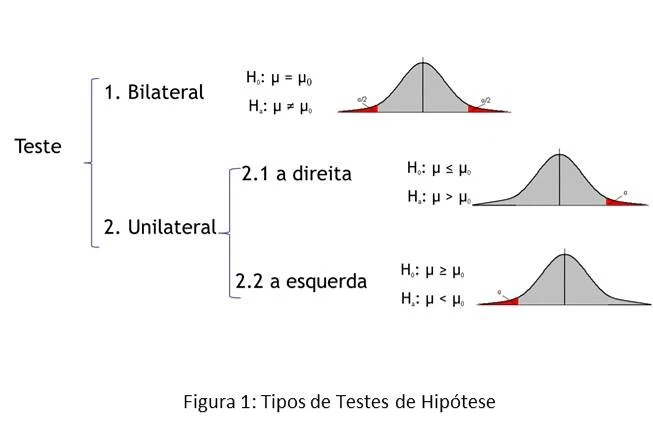

Também podemos falar em hipóteses alternativas simples e compostas:

* **Simples**: quando não há desigualdade.

* **Composta**: quando há desigualdade.

## p-Valor

É a probabilidade de obter uma estatística de teste igual ou maior  que a observada no H0.

Quanto menor  o p-valor maior a chance de se rejeitar a hipótese nula.

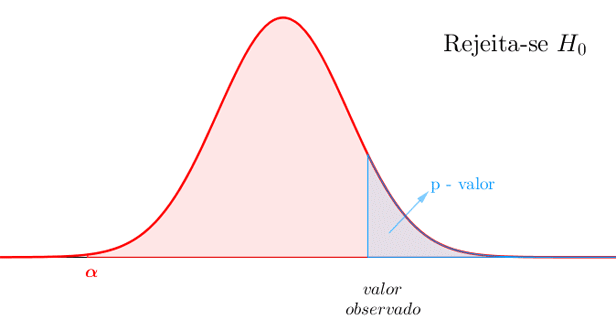

**O p-Valor nos permite fazer afirmação sobre os dados, não sobre a teoria testada.**

Distribuição de p-Valor:

* **pValor > alpha** = H0 é realmente falsa.
* **pValor < alpha** = H0 é realmente verdadeira. O p-Valor tem distribuição uniforme, com 100% de chance de cometermos um erro tipo I.


### Simulação de MonteCarlo


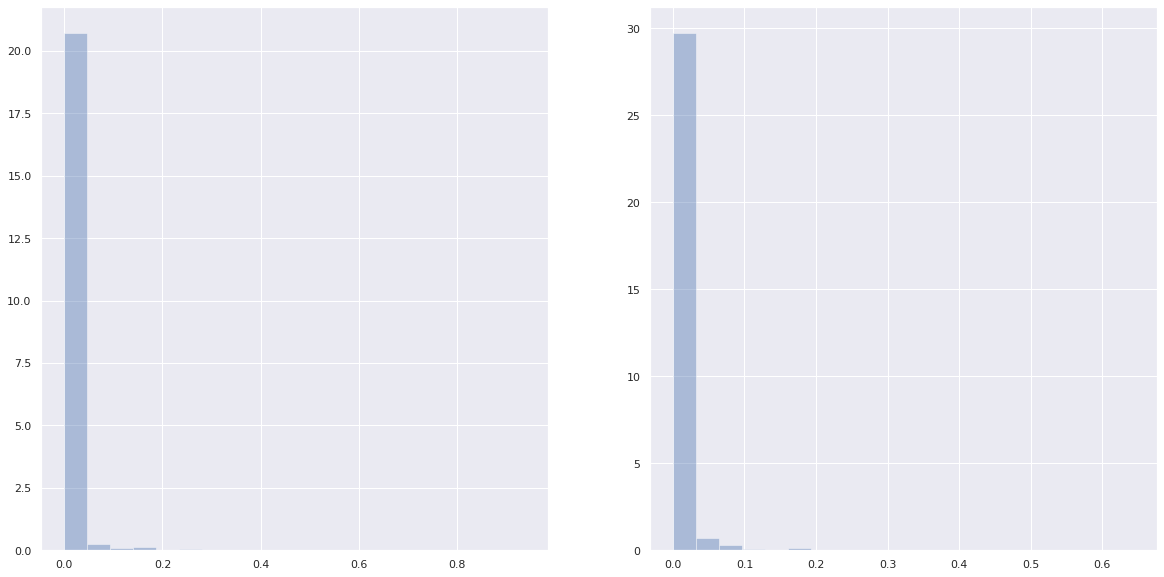

In [5]:
# H_0 é falsa.

pvalues1 = []
for i in range(1000):
  pvalues1.append(sct.ttest_1samp(sct.norm.rvs(loc=10, scale=5, size=100), popmean=12).pvalue) # Menor poder.

pvalues2 = []
for i in range(1000):
  pvalues2.append(sct.ttest_1samp(sct.norm.rvs(loc=10, scale=5, size=100), popmean=8).pvalue) # Maior poder.


fig, axs = plt.subplots(1, 2, figsize=(20, 10))
sns.distplot(pvalues1, kde=False, bins=20, hist_kws={"density": True}, ax=axs[0])
sns.distplot(pvalues2, kde=False, bins=20, hist_kws={"density": True}, ax=axs[1]);

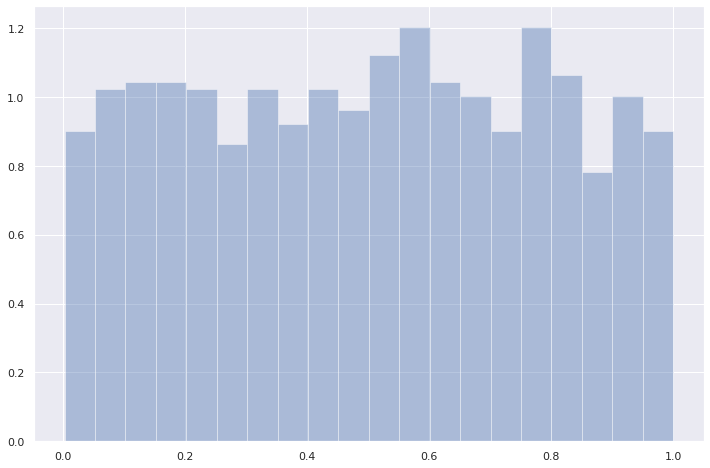

In [4]:

# H_0 é verdadeira.

pvalues = []
for i in range(1000):
  pvalues.append(sct.ttest_1samp(sct.norm.rvs(loc=10, scale=5, size=100), popmean=10).pvalue)


sns.distplot(pvalues, kde=False, bins=20, hist_kws={"density": True});

### Poder

O poder de um teste é a probabilidade de rejeitarmos $H_{0}$ quando $H_{0}$ é realmente falsa. Em outras palavras, o poder é a probabilidade de não cometermos um Erro Tipo II. O poder é **muito** inflenciado pelo tamanho da amostra.

### Q-Q plot

O q-q plot é um gráfico para comparação de distribuições de probabilidades.


**Q-Q plot para dados normais:**

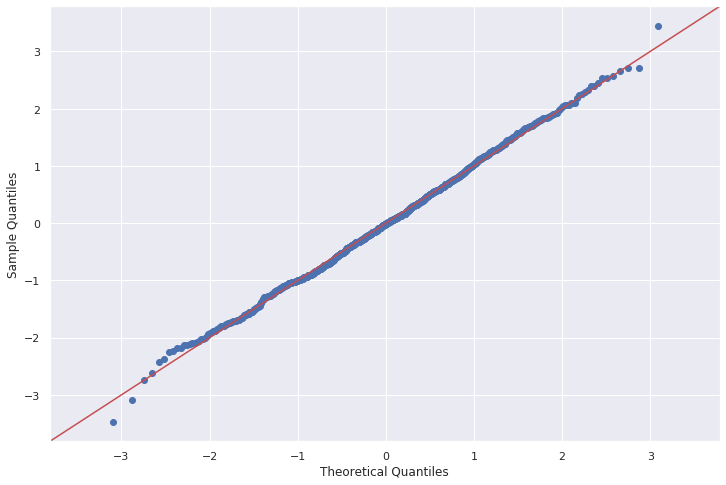

In [6]:
#Q-Q plot normal:
normal_data = sct.norm.rvs(loc=10, scale=4, size=1000)

sm.qqplot(normal_data, fit=True, line="45");

**Q-Q plot para dados não normais:**

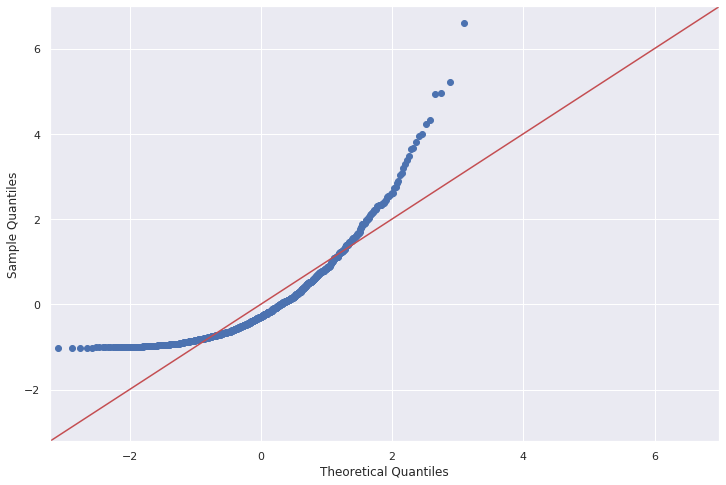

In [7]:
##Q-Q plot para dados exponenciais
non_normal_data = sct.expon.rvs(size=1000)

sm.qqplot(non_normal_data, fit=True, line="45");

### Testes de hipóteses clássicos

#### Teste de média de uma amostra: 

Nosso objetivo com esse teste é avaliar se uma dada amostra $S$ foi coletada de uma distribuição cuja média $\mu$ é igual a $\mu_{0}$.

Podemos formular nossas hipóteses da seguinte forma:

$$
\begin{cases}
  H_{0}: \mu = \mu_{0} \\
  H_{1}: \mu \neq \mu_{0}
\end{cases}
$$

In [11]:
#H0 não é rejeitada nesse caso.
data = sct.expon.rvs(scale=10, size=1000) # Mean = scale = 1/lambda = 10.

sct.ttest_1samp(data, popmean=10) # Deveria não rejeitar H_0.

Ttest_1sampResult(statistic=-0.7677729952822782, pvalue=0.44280349099083827)

In [12]:
#H0 deveria ser rejeitada 
data = sct.expon.rvs(scale=8, size=1000) # Mean = scale = 1/lambda = 8.

sct.ttest_1samp(data, popmean=10) # Deveria rejeitar H_0.

Ttest_1sampResult(statistic=-8.854354396977076, pvalue=3.7710612148592364e-18)

#### Teste de comparação da média de duas amostras

A comparação da média de duas amostras diferentes para descobrirmos se as duas amostras vêm de distribuições de mesma média.

Utiliza-se a diferença entre as duas médias amostrais e os respectivos desvios-padrão no cálculo da estatística de teste $t$.

In [13]:
#H0 não é rejeitada
data_one = sct.expon.rvs(scale=8, size=100) # Mesmas distribuições.
data_two = sct.expon.rvs(scale=8, size=100)

sct.ttest_ind(data_one, data_two) # Não deveria rejeitar H_0.

Ttest_indResult(statistic=-0.3679752683980917, pvalue=0.7132847492586355)

In [14]:
#H0 é rejeitada
data_one = sct.expon.rvs(scale=8, size=100) # Mesmas distribuições.
data_two = sct.expon.rvs(scale=8, size=100)

sct.ttest_ind(data_one, data_two) # Não deveria rejeitar H_0.

Ttest_indResult(statistic=-0.6681766143471729, pvalue=0.5047990085884275)

### Shapiro-Wilk ou Teste de normalidade

O teste de Shapiro-Wilk é um teste de aderência à distribuição normal, que abreviamos para teste de normalidade. Nosso intuito é verificar se uma dada amostra veio ou não de uma distribuição normal.

A implementação do Scipy suporta apenas 5000 amostras.

Esse teste funciona melhor com Q-Q plot.

In [15]:
#Normal
normal_data = sct.norm.rvs(loc=10, scale=4, size=100)

sct.shapiro(normal_data)

(0.9941204190254211, 0.9455565214157104)

In [16]:
#Exponencial
normal_data = sct.expon.rvs(scale=4, size=100)

sct.shapiro(normal_data)

(0.8097087740898132, 4.974428646775664e-10)

### Jarque-Bera

A estatística de teste é baseada na assimetria (skewness) e curtose (kurtosis) excessiva da amostra. Se a amostra vem de uma distribuição normal, então esses valores devem ser muito próximos de zero. Se isso acontecer, então a estatística de teste tem distribuição $\chi^{2}$ com dois graus de liberdade.


In [17]:
#Normal
normal_data = sct.norm.rvs(loc=10, scale=4, size=100)

sct.jarque_bera(normal_data)

(0.5788189233263544, 0.7487055764000001)

In [ ]:
#Exponencial
